# Step 1: Business Satement, Hypothesis Generation and Selective Models

### 1.1. Problem Statement:

__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


### 1.2. Hypothesis Generation:

Below are some of the __factors__ which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

- Salary: Applicants with high income should have more chances of loan approval.

- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

- Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

- Loan term: Loan for less time period and less amount should have higher chances of approval.

- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable, you can come up with many more factors


### 1.3. Selective Model:

__Outcome__: We have the outcome is "Loan_Status", this is a labeled and categorical data

Because all these above reasons we can go to predict outcome by using Decision Tree, Random Forest, ANN & Logistic Regression Modeling.

# Step 2: Preprocessing + EDA

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import plotly.express as ex

### Load Train and Test Data

In [65]:
train = pd.read_csv("loan_sanction_train.csv")
test = pd.read_csv("loan_sanction_test.csv")

### Copy of original data

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [66]:
train_original = train.copy()
test_original = test.copy()

In [67]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

In [68]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Because we want to predict Loan_Status, hence this value not appear in the test dataset

In [69]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

- int64: It represents the integer variables. ApplicantIncome is of this format.

- float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [70]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

### Univariate Analysis
In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

### Target Variable:

Loan_Status is the target variable, hence we use bar plot to analysis this outcome variable

In [72]:
count_loan_status = train["Loan_Status"].value_counts()
percentage_loan_status = train["Loan_Status"].value_counts(normalize=True)*100
print(count_loan_status)
print(percentage_loan_status)

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


<AxesSubplot: title={'center': 'Loan_Status'}>

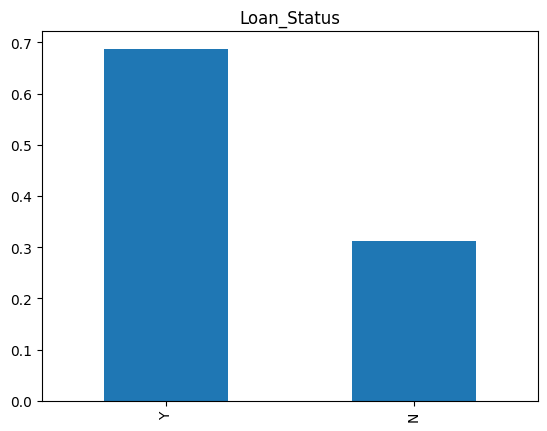

In [73]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

After analyzing the outcome, we should use SMOTE method to make the outcome balance, it will help the model not too bias with one side (yes in Loan_Status). We will do it later.

### Independent Variable (Categorical)

* Analysis on "Gender" variable :

In [74]:
count_gen = train["Gender"].count()
val_gen = train["Gender"].value_counts()

print(count_gen)
print(val_gen)

601
Male      489
Female    112
Name: Gender, dtype: int64


Base on the above values we can conclude that there are some missing values in Gender variable because the length of train dataset is 614, we will solve the missing values later

<AxesSubplot: title={'center': 'Gender'}>

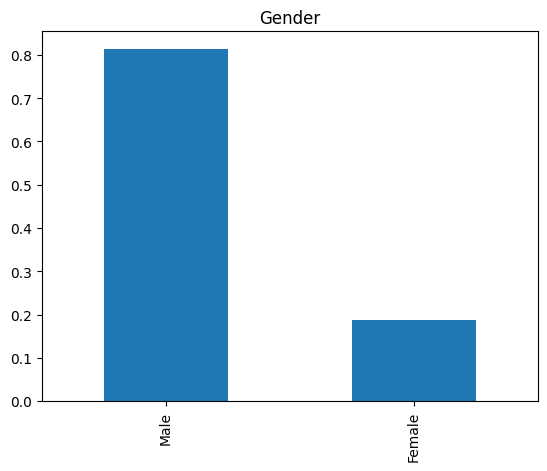

In [75]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In our train dataset the "Gender" variable contain Male : 81% Female: 19%

In [76]:
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})

* Analysis on "Married" variable :

In [77]:
count_ma = train["Married"].count()
val_ma = train["Married"].value_counts()
print(count_ma)
print(val_ma)


611
Yes    398
No     213
Name: Married, dtype: int64


Base on the above values we can conclude that there are some missing values in Married variable because the length of train dataset is 614, we will solve the missing values later

<AxesSubplot: title={'center': 'Married'}>

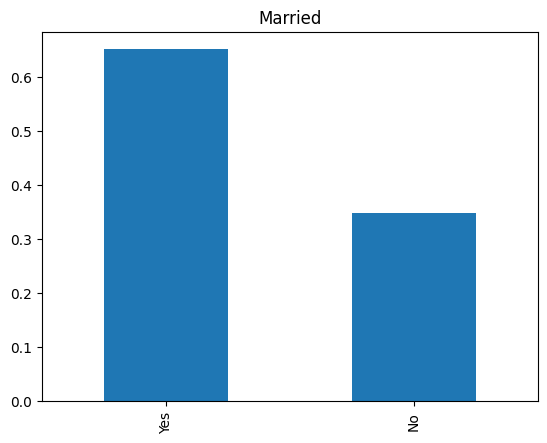

In [78]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

In [79]:
train['Married'] = train['Married'].map({'Yes': 1, 'No': 0})

* Analysis on "Self_Employed" variable :

In [80]:
count_sef_em = train["Self_Employed"].count()
val_sef_em = train["Self_Employed"].value_counts()
print(count_sef_em)
print(val_sef_em)

582
No     500
Yes     82
Name: Self_Employed, dtype: int64


Base on the above values we can conclude that there are some missing values in Self_Employed variable because the length of train dataset is 614, we will solve the missing values later

<AxesSubplot: title={'center': 'Self_Employed'}>

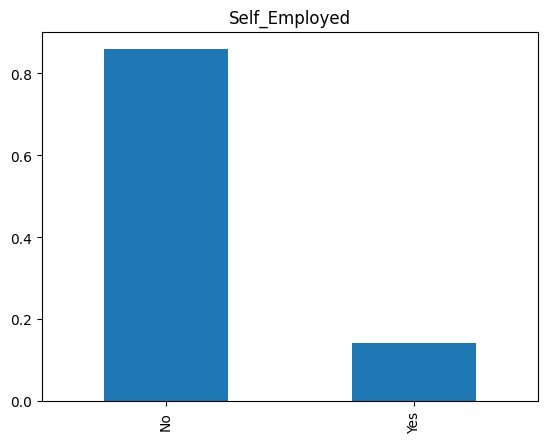

In [81]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

In [82]:
train['Self_Employed'] = train['Self_Employed'].map({'Yes': 1, 'No': 0})

* Analysis on "Credit_History" variable :

In [83]:
count_Credit_History = train["Credit_History"].count()
val_Credit_History = train["Credit_History"].value_counts()
print(count_Credit_History)
print(val_Credit_History)

564
1.0    475
0.0     89
Name: Credit_History, dtype: int64


Base on the above values we can conclude that there are some missing values in Credit_History variable because the length of train dataset is 614, we will solve the missing values later

<AxesSubplot: title={'center': 'Credit_History'}>

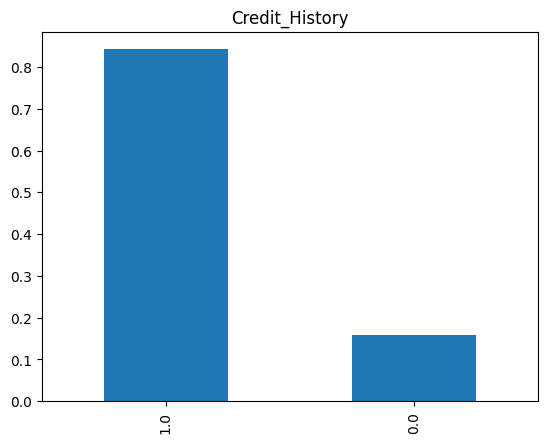

In [84]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

### Ordinal Variable Analysis 

* Analysis on "Dependents" variable :

In [85]:
count_Dependents = train["Dependents"].count()
val_Dependents = train["Dependents"].value_counts()
print(count_Dependents)
print(val_Dependents)

599
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Base on the above values we can conclude that there are some missing values in Dependents variable because the length of train dataset is 614, we will solve the missing values later

count_Credit_History = train["Credit_History"].count()
val_Credit_History = train["Credit_History"].value_counts()
print(count_Credit_History)
print(val_Credit_History)

<AxesSubplot: title={'center': 'Dependents'}>

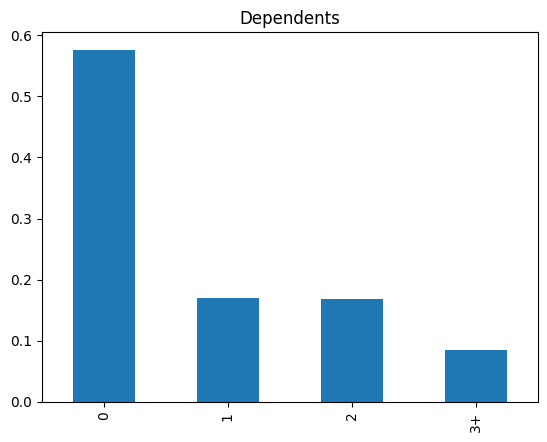

In [86]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

* Analysis on "Education" variable :

614
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot: title={'center': 'Education'}>

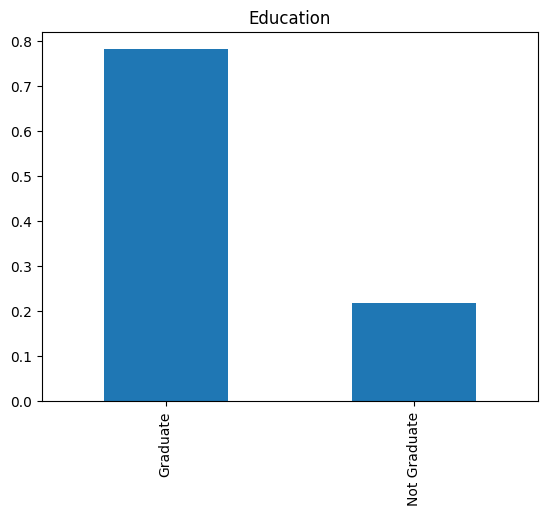

In [87]:
count_Education = train["Education"].count()
val_Education = train["Education"].value_counts()
print(count_Education)
print(val_Education)
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")

No missing values registered in Education

* Analysis on "Property_Area" variable :

614
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot: title={'center': 'Property_Area'}>

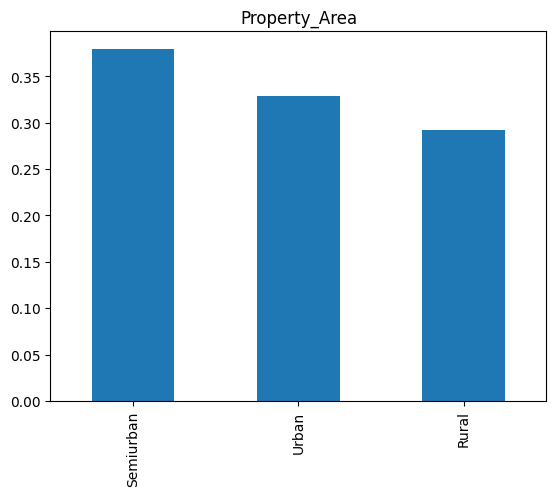

In [88]:
count_Property_Area = train["Property_Area"].count()
val_Property_Area = train["Property_Area"].value_counts()
print(count_Property_Area)
print(val_Property_Area)
train["Property_Area"].value_counts(normalize=True).plot.bar(title = "Property_Area")

No missing values registered in Property_Area

### Numerical Variables Analysis
 
* "ApplicantIncome" distribution :

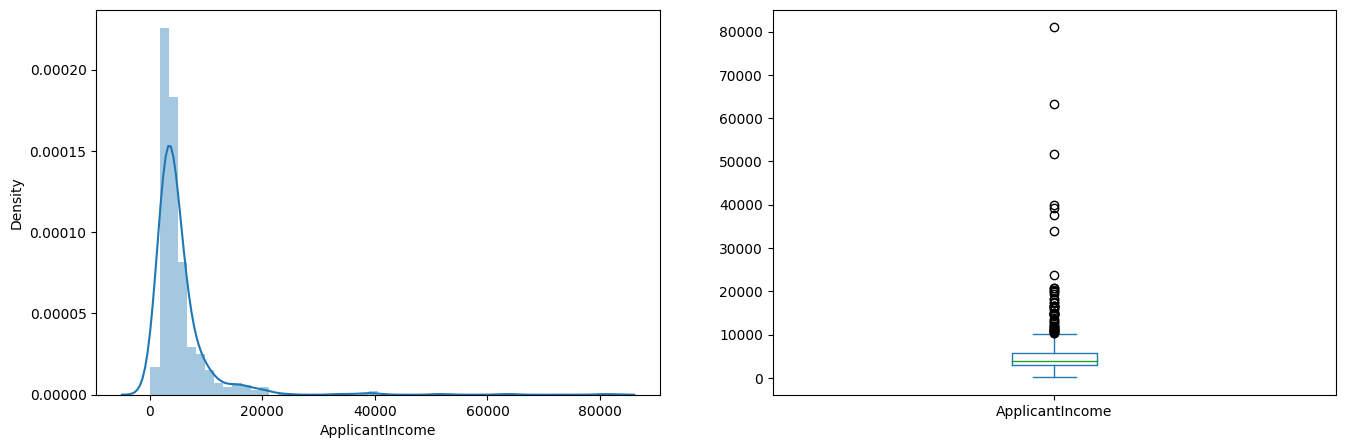

In [89]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. But in this case we will keep it because this is the real life situation.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

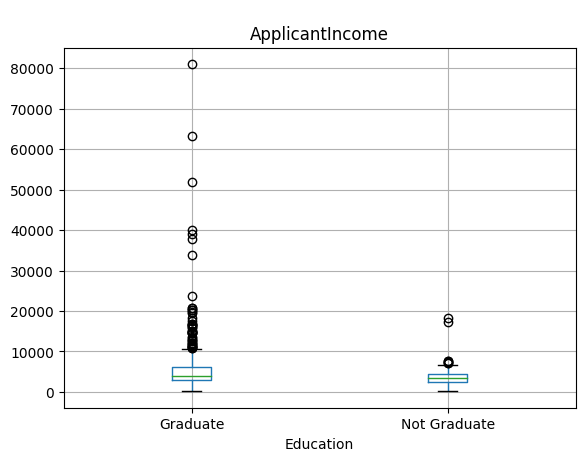

In [90]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

* Let’s look at the "CoapplicantIncome" distribution:

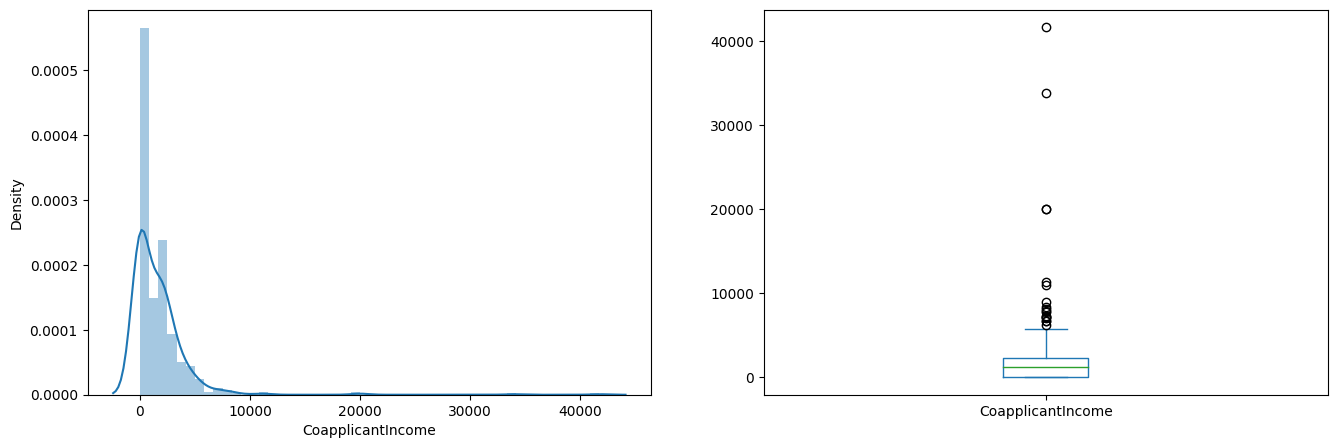

In [91]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

* Distribution of "LoanAmount" variable :

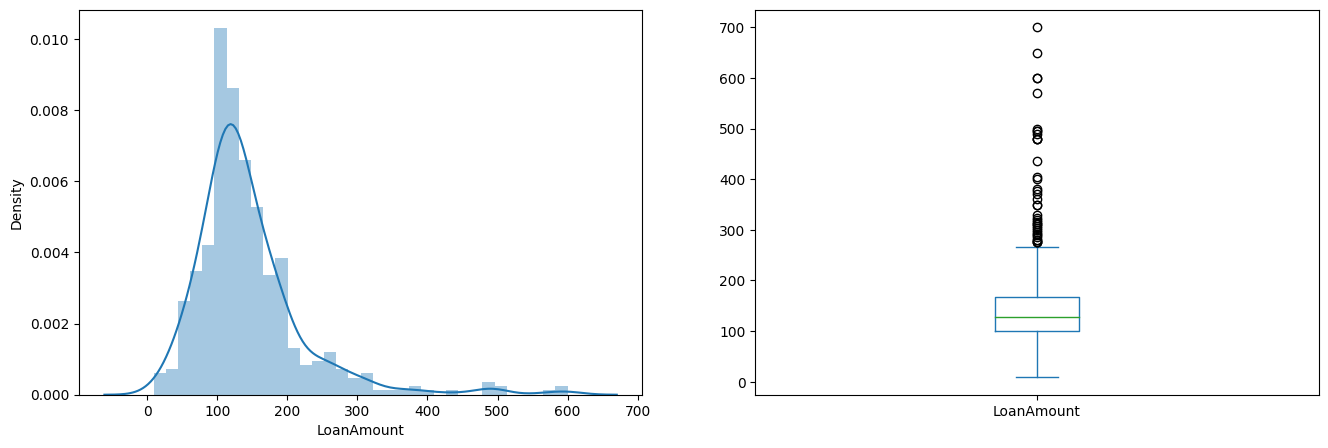

In [92]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

* Distribution of "LoanAmountTerm" variable :

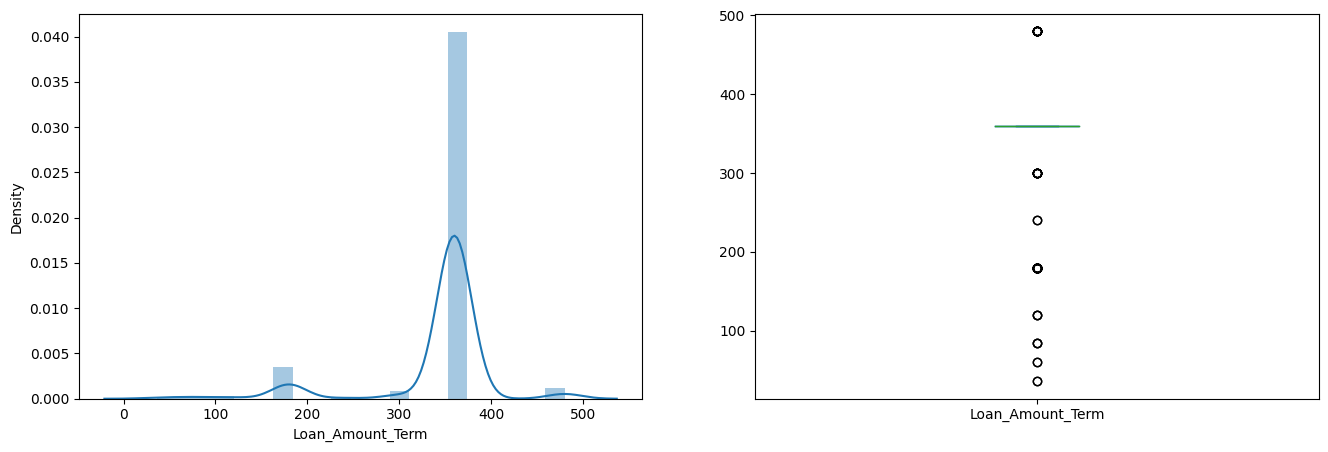

In [93]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.

### Bivariate Analysis:

Using Bivariate Analysis to check the Hypotheses that we generated earlier:

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.


* Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
0.0           37   75
1.0          150  339


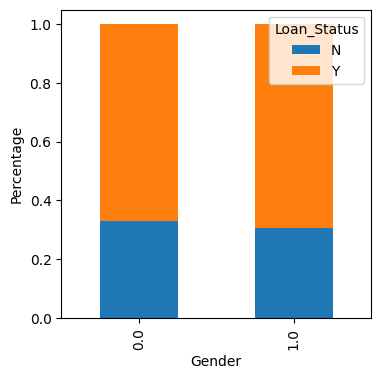

In [94]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 339

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 150

Proportion of Male applicants is higher for the approved loans.

* Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
0.0           79  134
1.0          113  285


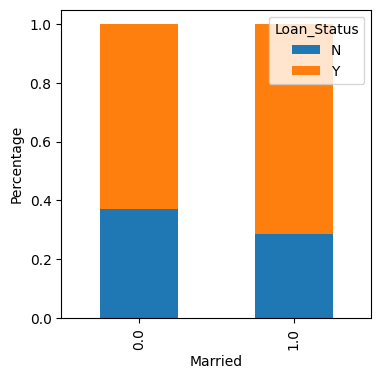

In [95]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 285

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

* Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


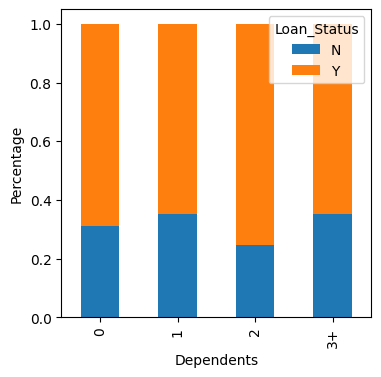

In [96]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0 and Loan was approed : 238

Number of dependents on the loan applicant : 0 and Loan was not approed : 107

Number of dependents on the loan applicant : 1 and Loan was approed : 66

Number of dependents on the loan applicant : 1 and Loan was not approed : 36

Number of dependents on the loan applicant : 2 and Loan was approed : 76

Number of dependents on the loan applicant : 2 and Loan was not approed : 25

Number of dependents on the loan applicant : 3+ and Loan was approed : 33

Number of dependents on the loan applicant : 3+ and Loan was not approed : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

* Relation between "Loan_Status" and "Education"

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


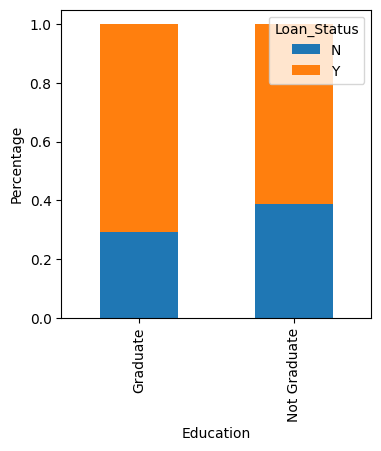

In [97]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Number of people who are Graduate and Loan was approed : 340

Number of people who are Graduate and Loan was no approed : 140

Number of people who are Not Graduate and Loan was approed : 82

Number of people who are Not Graduate and Loan was not approed : 52

Proportion of Graduate applicants is higher for the approved loans.

* Relation between "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
0.0            157  343
1.0             26   56


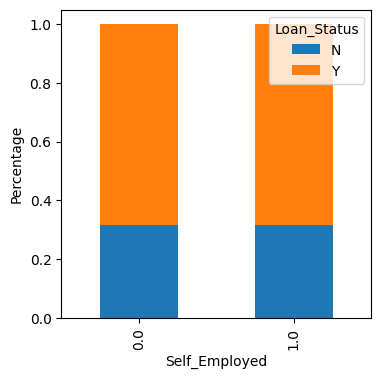

In [98]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

People who are Self_Employed and Loan was approed : 56

People who are Self_Employed and Loan was not approed : 26

People who are not Self_Employed and Loan was approed : 343

People who are not Self_Employed and Loan was not approed : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Relation between "Loan_Status" and "Credit_History"

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


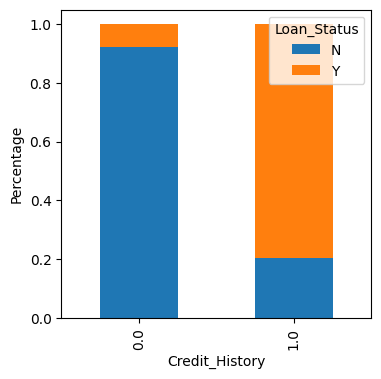

In [99]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

* Relation between "Loan_Status" and "Property_Area"

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


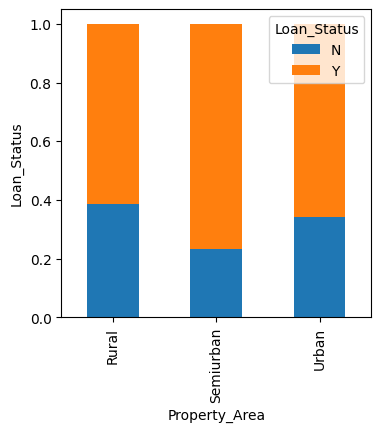

In [100]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Numerical Independent Variable vs Target Variable

* Relation between "Loan_Status" and "Income"

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


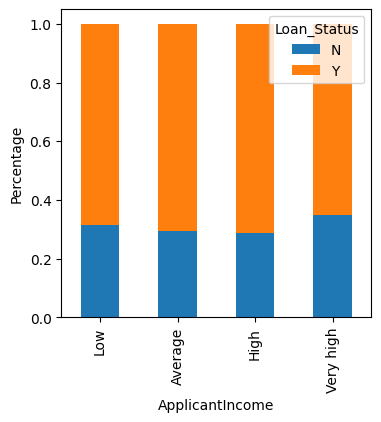

In [101]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

* The coapplicant income and loan amount variable with Target Variable

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


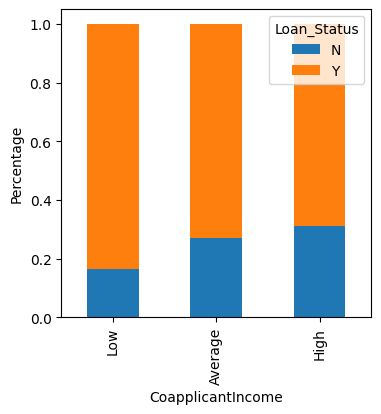

In [102]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


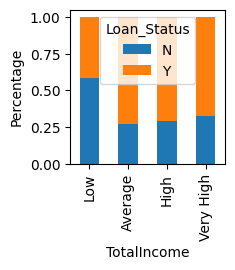

In [103]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

Whose TotalIncome was Low and loan was approved : 10

Whose TotalIncome was Low and loan was not approved : 14

Whose TotalIncome was Aerage and loan was apprvoed : 87

Whose TotalIncome was Average and loan was not approved : 32

Whose TotalIncome was High and loan was approved : 159

Whose TotalIncome was High and loan was not approved : 65

Whose TotalIncome was Very High and loan was approved : 166

Whose TotalIncome was Very High and loan was not approed : 81

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

* Relation between "Loan_Status" and "Loan Amount"

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


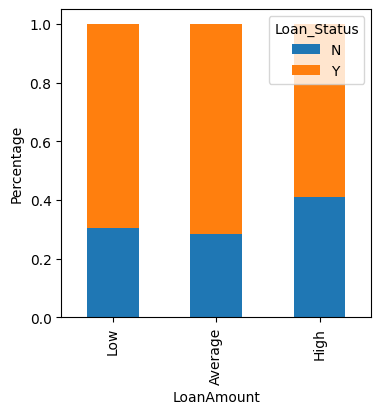

In [104]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Whose Loan Amount was low and Loan was approved : 86

Whose Loan Amount was low and Loan was not approved : 38

Whose Loan Amount was Average and Loan was approved : 207

Whose Loan Amount was Average and Loan was not approved : 83

Whose Loan Amount was High and Loan was approved : 39

Whose Loan Amount was High and Loan was not approved : 27

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable

In [105]:
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [106]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

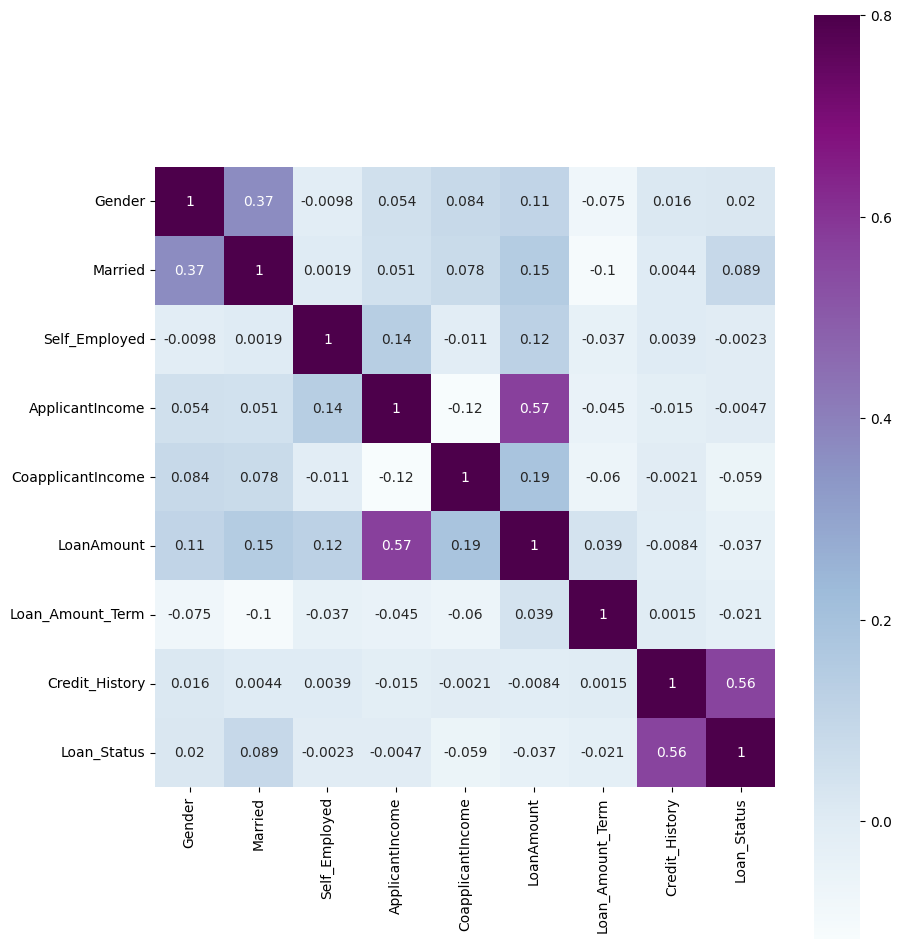

In [107]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). In this situation I decide keep them as it is because they correlation is not too high to be colinear

### __Missing Value and Outlier Treatment__

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

* Missing value imputation

Let’s list out feature-wise count of missing values.

In [108]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using random suitable for each variable

With categorical variables we will use random values for missing values.

In [109]:
import numpy as np
np.random.seed(42)  # You can choose any integer as the seed

# Filling each missing value with a separate random integer between 0 and 3 (4 is exclusive)

Categorical_value = ["Gender","Married","Dependents","Self_Employed","Credit_History"]

for columns in Categorical_value:
    train[columns].fillna(train[columns].mode()[0], inplace=True)

In [110]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

We decided to keep these two values about 

In [111]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

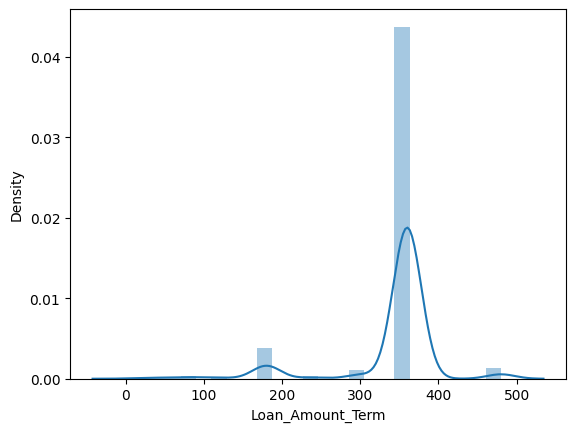

In [112]:
sns.distplot(train["Loan_Amount_Term"]);

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [113]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

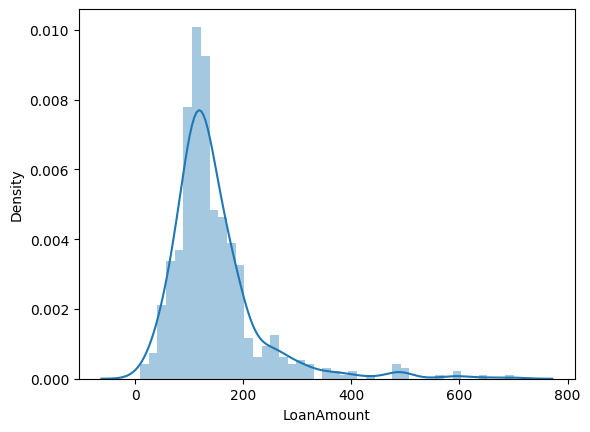

In [114]:
sns.distplot(train["LoanAmount"]);
train["LoanAmount"].value_counts()

This is approximately normal distribution in LoanAmount variable

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

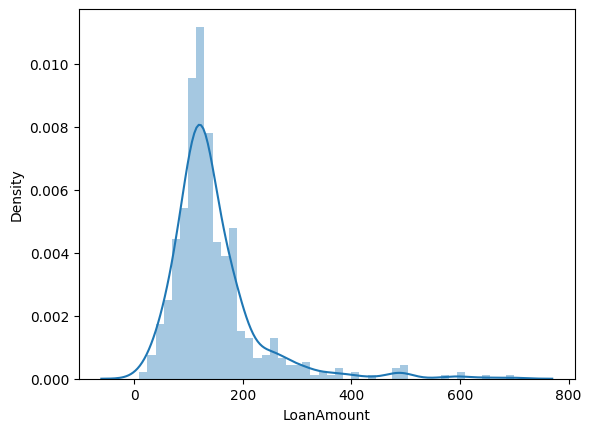

In [115]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)
sns.distplot(train["LoanAmount"]);

As we can see that all the missing values have been filled in the train dataset.

Let’s fill all the missing values in the test dataset too with the same approach

In [116]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [117]:
Categorical_value_test = ["Gender","Dependents","Self_Employed","Credit_History"]

for columns in Categorical_value:
    test[columns].fillna(test[columns].mode()[0], inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)


In [118]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### __Feature Engineering__

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

* Total income

In [119]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


Update for test dataset 

In [120]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

* EMI

In [121]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


* Balance Income

In [122]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [123]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Loan_ID"],axis=1)
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Loan_ID"],axis=1)

In [124]:
train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,Balance_Income
0,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,5849.0,0.355556,5493.444444
1,1.0,1.0,1,Graduate,0.0,1.0,Rural,0,6091.0,0.355556,5735.444444
2,1.0,1.0,0,Graduate,1.0,1.0,Urban,1,3000.0,0.183333,2816.666667
3,1.0,1.0,0,Not Graduate,0.0,1.0,Urban,1,4941.0,0.333333,4607.666667
4,1.0,0.0,0,Graduate,0.0,1.0,Urban,1,6000.0,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,Graduate,0.0,1.0,Rural,1,2900.0,0.197222,2702.777778
610,1.0,1.0,3,Graduate,0.0,1.0,Rural,1,4106.0,0.222222,3883.777778
611,1.0,1.0,1,Graduate,0.0,1.0,Urban,1,8312.0,0.702778,7609.222222
612,1.0,1.0,2,Graduate,0.0,1.0,Urban,1,7583.0,0.519444,7063.555556


In [125]:
excel_file_path = 'train_data.xlsx'

# Export the DataFrame to Excel
train.to_excel(excel_file_path, index=False)

We need to change all categorical variables to number, hence using dummy in this situation

In [126]:
train_dummies =pd.get_dummies(train)
test_dummies =pd.get_dummies(test)

In [127]:
train_dummies

,Gender,Married,Self_Employed,Credit_History,Loan_Status,TotalIncome,EMI,Balance_Income,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1.0,1,5849.0,0.355556,5493.444444,0,1,0,0,1,0,0,0,1
1,1.0,1.0,0.0,1.0,0,6091.0,0.355556,5735.444444,0,0,1,0,1,0,1,0,0
2,1.0,1.0,1.0,1.0,1,3000.0,0.183333,2816.666667,0,1,0,0,1,0,0,0,1
3,1.0,1.0,0.0,1.0,1,4941.0,0.333333,4607.666667,0,1,0,0,0,1,0,0,1
4,1.0,0.0,0.0,1.0,1,6000.0,0.391667,5608.333333,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,1,2900.0,0.197222,2702.777778,0,1,0,0,1,0,1,0,0
610,1.0,1.0,0.0,1.0,1,4106.0,0.222222,3883.777778,1,0,0,0,1,0,1,0,0
611,1.0,1.0,0.0,1.0,1,8312.0,0.702778,7609.222222,0,0,1,0,1,0,0,0,1
612,1.0,1.0,0.0,1.0,1,7583.0,0.519444,7063.555556,0,0,0,1,1,0,0,0,1


In [128]:
train_dummies[train_dummies.columns[:8]]

,Gender,Married,Self_Employed,Credit_History,Loan_Status,TotalIncome,EMI,Balance_Income
0,1.0,0.0,0.0,1.0,1,5849.0,0.355556,5493.444444
1,1.0,1.0,0.0,1.0,0,6091.0,0.355556,5735.444444
2,1.0,1.0,1.0,1.0,1,3000.0,0.183333,2816.666667
3,1.0,1.0,0.0,1.0,1,4941.0,0.333333,4607.666667
4,1.0,0.0,0.0,1.0,1,6000.0,0.391667,5608.333333
...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,1,2900.0,0.197222,2702.777778
610,1.0,1.0,0.0,1.0,1,4106.0,0.222222,3883.777778
611,1.0,1.0,0.0,1.0,1,8312.0,0.702778,7609.222222
612,1.0,1.0,0.0,1.0,1,7583.0,0.519444,7063.555556


In [129]:
pcs = PCA()
pcs.fit(train_dummies[train_dummies.columns[8:]].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,0.6032,0.5916,0.5837,0.5349,0.4056,0.31,0.0,0.0,0.0
Proportion of variance,0.2272,0.2185,0.2128,0.1787,0.1027,0.06,0.0,0.0,0.0
Cumulative proportion,0.2272,0.4457,0.6585,0.8372,0.9400,1.00,1.0,1.0,1.0


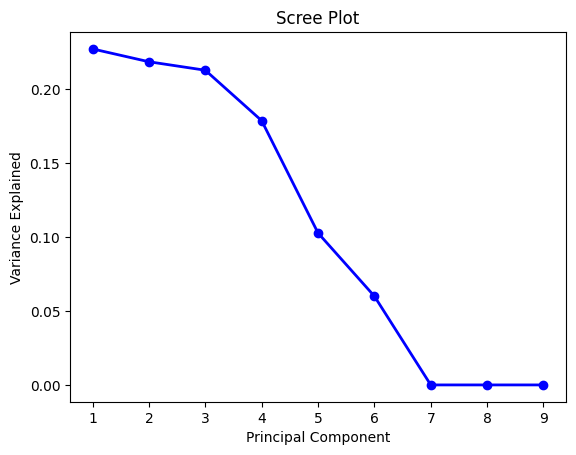

[2.27213116e-01 2.18533718e-01 2.12802618e-01 1.78699484e-01
 1.02743296e-01 6.00077680e-02 2.72618104e-31 9.12452801e-32
 6.11372871e-32]


In [130]:
# Define the number of PCA
PC_values = np.arange(len(pcsSummary_df.columns)) + 1
plt.plot(PC_values, pcsSummary_df.loc['Proportion of variance'], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pcs.explained_variance_ratio_)

We will stop at PC5

In [131]:
N_COMPONENTS = 6

pca_model = PCA(n_components = N_COMPONENTS )

pc_matrix = pca_model.fit_transform(train_dummies[train_dummies.columns[8:]].dropna(axis=0))

evr = pca_model.explained_variance_ratio_
total_var = evr.sum() * 100
cumsum_evr = np.cumsum(evr)

Combine dataset with PC5

In [152]:
df_with_pcs = pd.concat([train_dummies[train_dummies.columns[:8]],pd.DataFrame(pc_matrix,
                                                           columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)
df_with_pcs["Credit_History"].unique()

array([1., 0.])

In [133]:
df_with_pcs_nostatus = df_with_pcs.drop(["Loan_Status"], axis = 1)
df_with_pcs_status = df_with_pcs["Loan_Status"]

In [155]:
df_with_pcs_status 

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Before assign value for predictors and outcome we will make the outcome balance by using SMOTE method as discussing before.

In [134]:
oversample = SMOTE()

X, y = oversample.fit_resample(df_with_pcs_nostatus, df_with_pcs_status)
usampled_df = X.assign(Loan_Status = y)
usampled_df.columns[0:]

Index(['Gender', 'Married', 'Self_Employed', 'Credit_History', 'TotalIncome',
       'EMI', 'Balance_Income', 'PC-0', 'PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5',
       'Loan_Status'],
      dtype='object')

In [135]:
ex.pie(usampled_df,names='Loan_Status',title='Proportion of Loan approval',hole=0.33)

# Step 3: Model Building

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest

We will build the following models in this section.

i)Logistic Regression

ii)Decision Tree

iii)Random Forest

iv)Random Forest with Grid Search

Let’s prepare the data for feeding into the models.


In [136]:
usampled_df

,Gender,Married,Self_Employed,Credit_History,TotalIncome,EMI,Balance_Income,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,Loan_Status
0,1.000000,0.000000,0.000000,1.000000,5849.000000,0.355556,5493.444444,0.097950,-0.706924,-0.520413,-0.473454,-0.049401,0.020703,1
1,1.000000,1.000000,0.000000,1.000000,6091.000000,0.355556,5735.444444,0.287850,-0.157984,0.256972,1.053282,0.764327,-0.234632,0
2,1.000000,1.000000,1.000000,1.000000,3000.000000,0.183333,2816.666667,0.097950,-0.706924,-0.520413,-0.473454,-0.049401,0.020703,1
3,1.000000,1.000000,0.000000,1.000000,4941.000000,0.333333,4607.666667,0.933263,0.191042,-0.186393,-1.091250,-0.024233,-0.024392,1
4,1.000000,0.000000,0.000000,1.000000,6000.000000,0.391667,5608.333333,0.097950,-0.706924,-0.520413,-0.473454,-0.049401,0.020703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1.000000,1.000000,0.000000,0.794955,6178.675286,0.689467,5489.207848,0.934910,0.364154,-0.247449,-0.868399,-0.002004,-0.039627,0
840,0.251442,0.251442,0.251442,1.000000,10000.000000,0.553236,9446.764178,-0.573827,0.148758,-0.103135,0.103706,0.174423,-0.075206,0
841,1.000000,1.000000,0.274732,0.274732,4742.252682,0.371246,4371.007152,-0.207048,0.069312,0.547055,-0.077418,-0.534472,-0.146084,0
842,0.792772,0.792772,0.000000,0.792772,4951.640887,0.308133,4643.508321,0.042939,-0.742373,0.393345,-0.071210,0.515073,-0.131593,0


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

x = usampled_df[usampled_df.columns[:-1]]
y = usampled_df['Loan_Status']

num_splits = 5

kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=1)

x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

* __Logistic Regression__

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Let’s predict the Loan_Status for validation set

In [139]:
pred_cv_logistic=logistic_model.predict(x_cv)
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
score_logistic

69.68503937007874

* __Decision Tree__

In [140]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [141]:
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
score_tree

74.40944881889764

* __Random Forest__

In [142]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [143]:
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
score_forest

80.70866141732283

* __Random Forest with Grid-search__

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [144]:
from sklearn.model_selection import GridSearchCV

Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators.

In [145]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

Find out optimize values

In [146]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=19, n_estimators=181, random_state=1)

The optimized value for the max_depth variable is 13 and for n_estimator is 81,random_state = 1. Now let’s build the model using these optimized values.

In [147]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=13,n_estimators=81)
grid_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=13, n_estimators=81, random_state=1)

In [148]:
pred_grid_forest = grid_forest_model.predict(x_cv)
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100
score_grid_forest

81.49606299212599

In [149]:
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import classification_report

classificationSummary(y_cv, pred_grid_forest)

Confusion Matrix (Accuracy 0.8150)

       Prediction
Actual   0   1
     0 103  30
     1  17 104


* __Evaluate Models__

In [150]:
from sklearn.metrics import classification_report
print("Logistic Regression - Classification Report:")
print(classification_report(y_cv, pred_cv_logistic))

print("Decision Tree - Classification Report:")
print(classification_report(y_cv, pred_cv_tree))

print("Random Forest - Classification Report:")
print(classification_report(y_cv, pred_cv_forest))

print("Random Forest with Grid-search - Classification Report:")
print(classification_report(y_cv, pred_grid_forest))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       133
           1       0.64      0.83      0.72       121

    accuracy                           0.70       254
   macro avg       0.71      0.70      0.69       254
weighted avg       0.72      0.70      0.69       254

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       133
           1       0.75      0.69      0.72       121

    accuracy                           0.74       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.74      0.74      0.74       254

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       133
           1       0.76      0.88      0.81       121

    accuracy                           0.81       254
   ma

After Using and compare model I decide to go with Random Forest no grid to predict the test dataset